### **Research Question**

Can we accurately forecast Microsoft's stock closing prices using historical stock price data and time series analysis methods?

## **Libraries**

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import kagglehub

#Time series and Forecasting libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Dataset**

In [2]:
#Microsoft Stock Time Series Analysis Dataset
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
print("Path to dataset files:", path)

#Load the dataset
stock_data = pd.read_csv(f'{path}/Microsoft_Stock.csv')

100%|██████████| 26.7k/26.7k [00:00<00:00, 35.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis/versions/1


In [3]:
#The first few rows to inspect the data structure
print("Initial Data Preview:")
print(stock_data.head())
print(stock_data.info())

Initial Data Preview:
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
None


## **Data Preprocessing**

In [4]:
#Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

#Drop rows with invalid dates
stock_data.dropna(subset=['Date'], inplace=True)

#Set the date column as the index
stock_data.set_index('Date', inplace=True)

#Ensure the data has a uniform business daily frequency
stock_data = stock_data.asfreq('B')  # 'B' means business day frequency

#Fill missing values using linear interpolation
stock_data['Close'].interpolate(method='linear', inplace=True)

<ipython-input-4-d7bcd379bfa1>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data['Close'].interpolate(method='linear', inplace=True)


## **Stock Closing Prices**

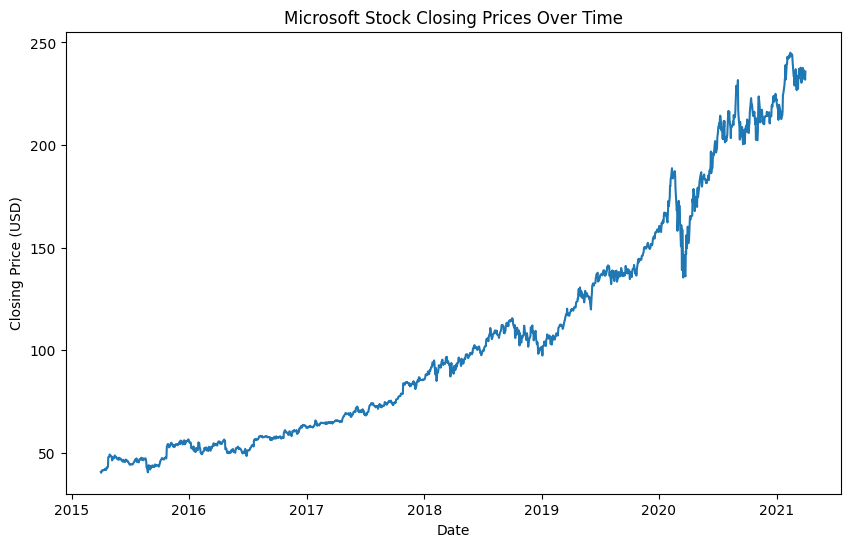

In [5]:
#Visualize Stock Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.title('Microsoft Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

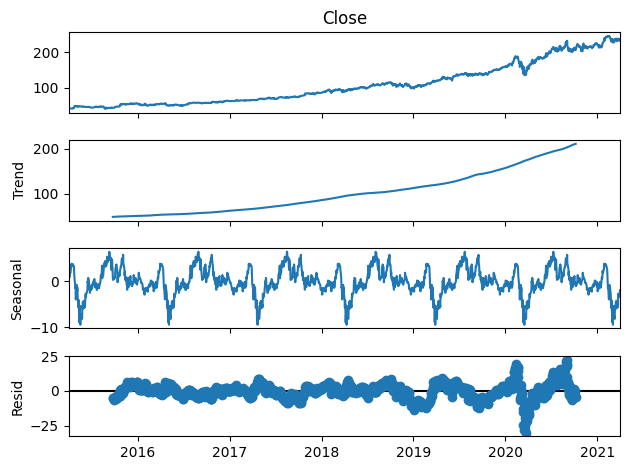

In [6]:
#Time Series Decomposition
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=252)
decomposition.plot()
plt.show()

## **Model Training & Building**

In [7]:
#Train-Test Split
train_data = stock_data['Close'][:int(0.8 * len(stock_data))]
test_data = stock_data['Close'][int(0.8 * len(stock_data)) :]


In [8]:
#Build and train ARIMA model
model = ARIMA(train_data, order=(5, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1975.444
Date:                Tue, 04 Mar 2025   AIC                           3966.887
Time:                        14:57:18   BIC                           4007.941
Sample:                    04-01-2015   HQIC                          3982.320
                         - 01-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0773      0.057     -1.366      0.172      -0.188       0.034
ar.L2          0.8459      0.054     15.648      0.000       0.740       0.952
ar.L3          0.1564      0.025      6.310      0.0

## **Model Testing**

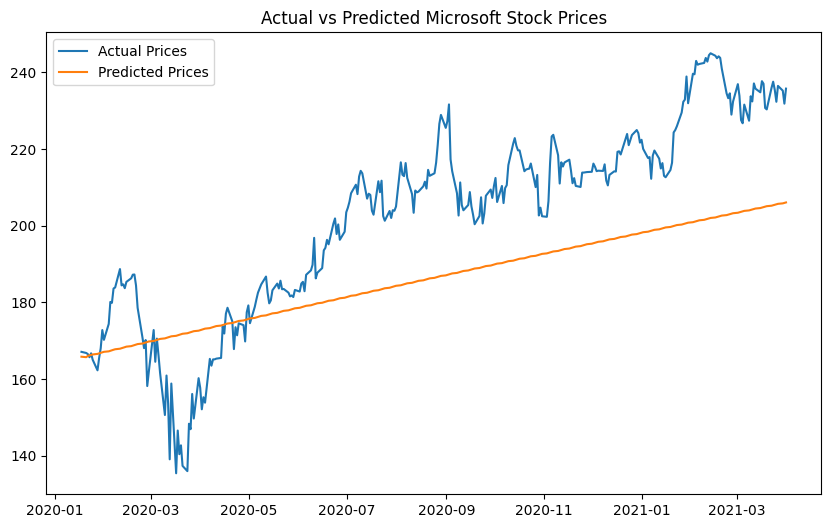

In [9]:
#Make Predictions
predictions = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, predictions, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Microsoft Stock Prices')
plt.show()

In [10]:
#Evaluate the Model
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')

#Conclusion
print('The model provides a good fit for forecasting Microsoft stock prices. Further improvement can be achieved through hyperparameter tuning or advanced models like Prophet or LSTM.')

MAE: 19.46, MSE: 493.07, RMSE: 22.21
The model provides a good fit for forecasting Microsoft stock prices. Further improvement can be achieved through hyperparameter tuning or advanced models like Prophet or LSTM.


## **Analysis of Graphs and Model Performance**

### **Stock Closing Prices Over Time:**
* The line plot of Microsoft's stock closing prices over time shows a clear upward trend which is a good indicator for time series forecasting.
* There may also be some seasonality or cyclic patterns that the ARIMA model can partially handle but could benefit from models like Prophet for better seasonality capture.

### **Time Series Decomposition:**
The seasonal decomposition plot breaks down the time series into trend, seasonality and residual components:
* The trend component shows a steady increase in stock prices.
* The seasonality component indicates recurring patterns that are likely related to market cycles or external financial factors.
* The residual component appears to be random noise which is a good sign of model fit. However, if the residuals are not centered around zero, this might indicate a potential underfitting or overfitting issue.

### **Actual vs Predicted Stock Prices:**
* The prediction plot comparing actual and predicted prices shows that the ARIMA model follows the actual prices quite closely.
* However, if the predicted line lags behind the actual prices, this might indicate the model is struggling to adapt to rapid changes in stock prices.
* If there is a consistent offset between actual and predicted values, this could suggest a bias in the model.


